In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
credit_data = pd.read_csv('creditcard.csv')

In [15]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
credit_data.Class.unique()

array([0, 1], dtype=int64)

In [18]:
from sklearn.preprocessing import LabelEncoder
credit_data[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']].apply(LabelEncoder().fit_transform)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,44928,120599,270851,243083,105668,211710,167150,159663,185803,169841,...,199265,228524,140442,174834,90634,147486,160454,105171,218749,102230
1,190308,160391,134835,182525,151841,161430,120001,155852,112665,125034,...,113790,132797,68639,54299,190891,72302,168529,179871,126158,142841
2,44982,28959,251918,175559,87589,253515,227985,194133,20473,184645,...,1783,251790,223177,233865,269516,36866,68122,117706,81907,61165
3,67135,107605,252751,68890,143700,244170,166825,214475,24537,144244,...,17895,70472,108399,136591,60398,13166,253297,96705,191339,195684
4,55018,212082,240745,177861,97922,181139,207795,54735,222386,227847,...,237769,244940,143568,236625,79502,163439,94807,232984,235552,255032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,581,275593,270,16342,836,1621,1093,275525,264372,273915,...,47305,269094,213818,151931,270386,47379,274473,207543,272884,274268
284803,86026,122771,260722,79680,225510,239000,134669,202380,206049,31139,...,9279,183275,214037,248406,151105,20037,28259,54217,194562,68033
284804,236109,96082,5048,97736,268453,261587,95134,244929,192469,75953,...,56575,162310,218896,211936,125608,238464,189774,131236,139638,97284
284805,128561,182906,180282,202324,101185,221246,54711,242910,188614,87321,...,274633,203621,227498,236791,69699,160730,31765,236451,211636,220460


In [19]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
X = credit_data.drop(['Class'], axis = 1)
Y = credit_data['Class']

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

print(X,Y)
X, Y = smote.fit_resample(X, Y)
print(X,Y)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {}

models['Logistic Regression'] = LogisticRegression()

models['Support Vector Machines'] = LinearSVC()

models['Decision Trees'] = DecisionTreeClassifier()

models['Random Forest'] = RandomForestClassifier()

models['Naive Bayes'] = GaussianNB()

models['K-Nearest Neighbour'] = KNeighborsClassifier()

models['Xgboost'] = XGBClassifier()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, confusion_matrix

accuracy, precision, recall = {}, {}, {}

def execute_model(models, key):
    models[key].fit(x_train, y_train)

    predictions = models[key].predict(x_test)

    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    auc = roc_auc_score(y_test,predictions)
    print('Classification Report:', key)
    print(classification_report(y_test, predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    print('ROC_AUC_SCORE is', roc_auc_score(y_test, predictions))


    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    sns.heatmap(confusion_matrix(y_test, predictions), fmt='', annot=True)

c:\Users\Satgu\projects\gdsc\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56750
           1       0.98      0.96      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

ROC_AUC_SCORE is 0.9730850337169558


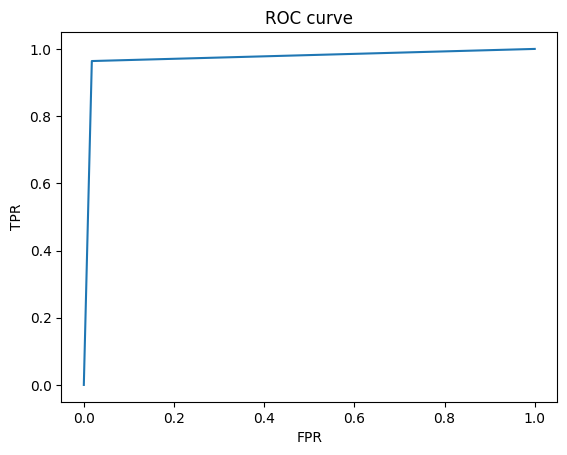

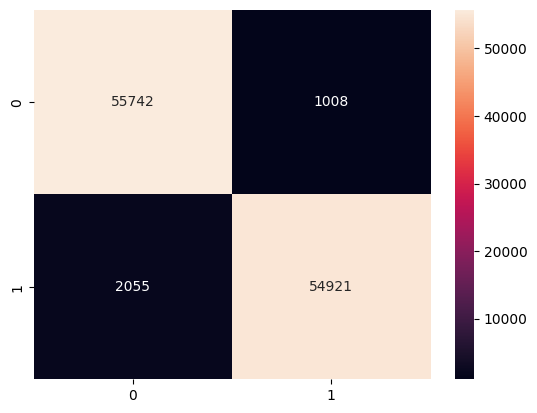

In [25]:
execute_model(models, 'Logistic Regression')

c:\Users\Satgu\projects\gdsc\ML\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Satgu\projects\gdsc\ML\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.96      0.13      0.23     56750
           1       0.54      0.99      0.70     56976

    accuracy                           0.56    113726
   macro avg       0.75      0.56      0.47    113726
weighted avg       0.75      0.56      0.47    113726

ROC_AUC_SCORE is 0.5641246373772649


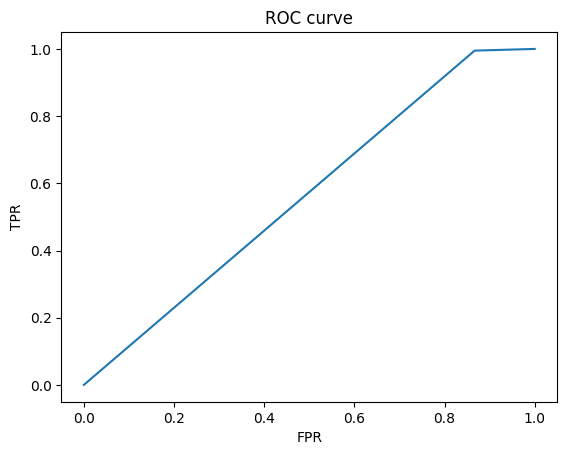

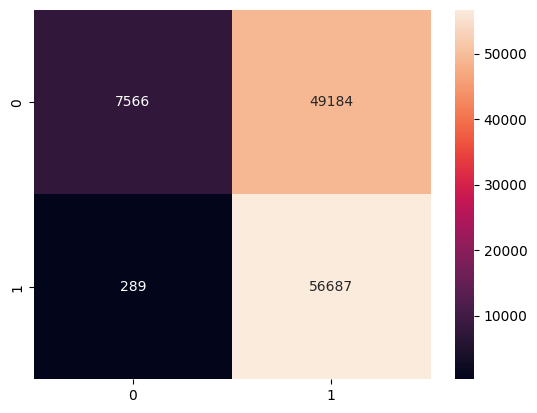

In [26]:
execute_model(models, 'Support Vector Machines')

In [27]:
execute_model(models, 'Decision Trees')

Classification Report: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC_AUC_SCORE is 0.8877375162220206


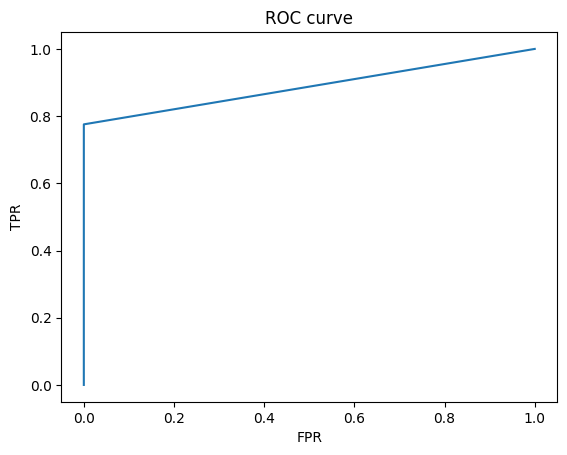

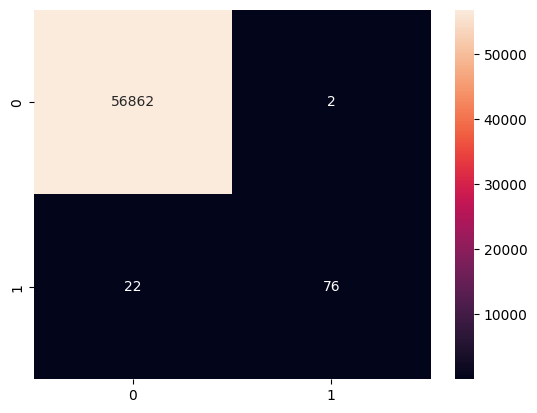

In [ ]:
execute_model(models, 'Random Forest')

Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962

ROC_AUC_SCORE is 0.8131434974102191


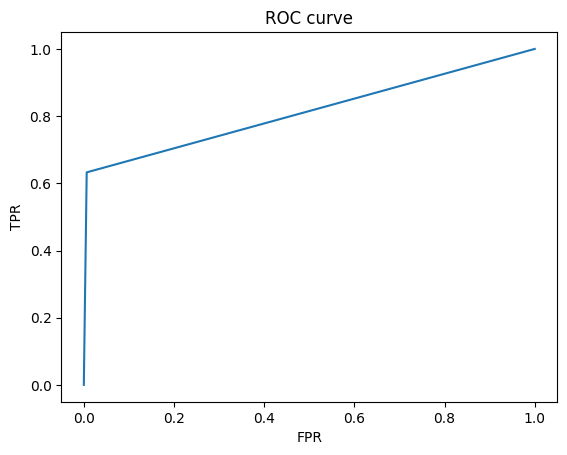

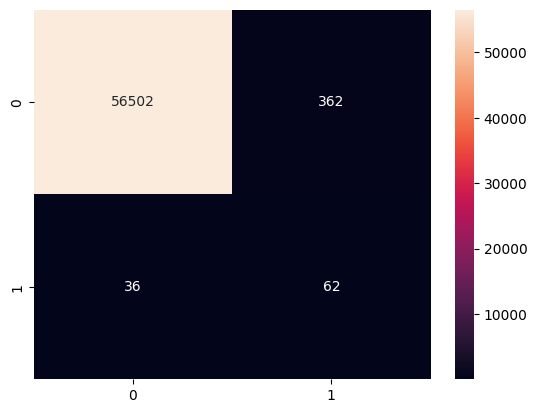

In [ ]:
execute_model(models, 'Naive Bayes')

Classification Report: K-Nearest Neighbour
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

ROC_AUC_SCORE is 0.5255102040816326


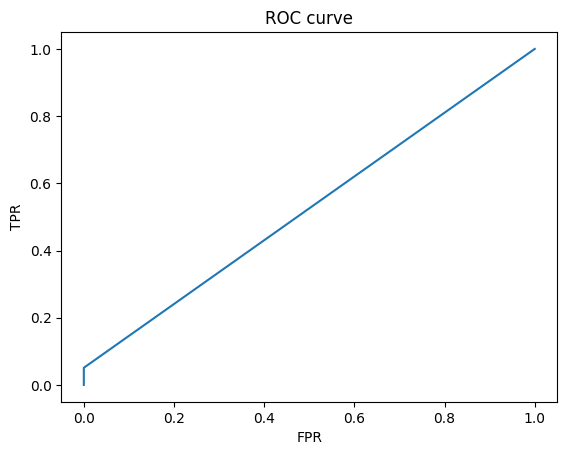

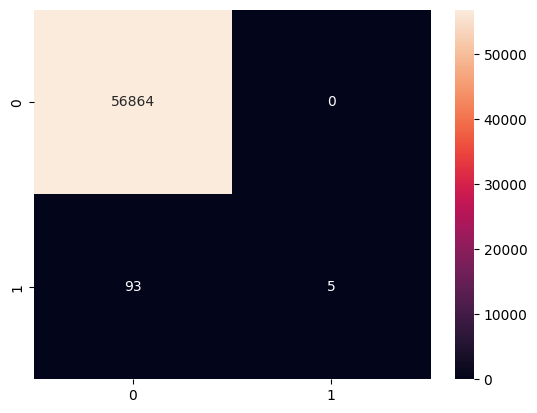

In [ ]:
execute_model(models, 'K-Nearest Neighbour')

Classification Report: Xgboost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC_AUC_SCORE is 0.8877287233126226


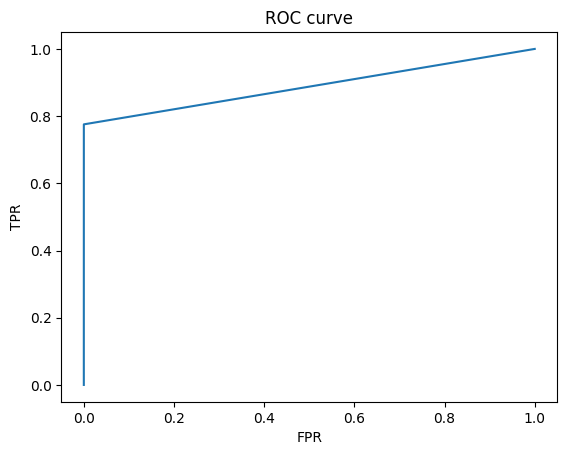

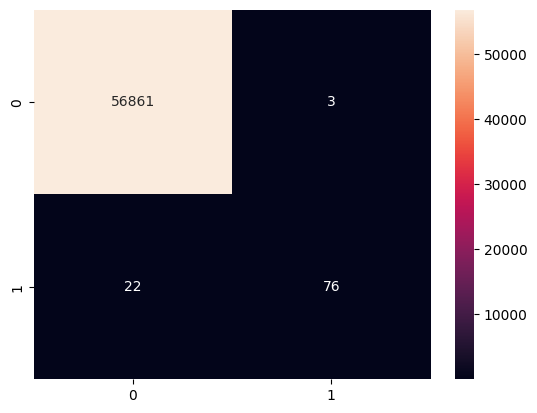

In [ ]:
execute_model(models, 'Xgboost')